# Obtained_data:

In [1]:
import numpy as np 

In [2]:
import pandas as pd
user_data=pd.read_csv("Final_User_Dataset.csv")
item_data=pd.read_csv("Final_Anime_Dataset.csv")
user_input=pd.read_csv("User_input.csv")



In [3]:
user_data[user_data.columns[21]].dtype

dtype('float64')

In [4]:
user_data.iloc[21, :].unique()

array([np.int64(347), 'troublesome4u', 'Male', np.float64(1978.0),
       np.float64(8.64), np.float64(167.0), np.float64(8.84),
       np.float64(8.83), np.float64(7.89), np.float64(9.56),
       np.float64(6.98), np.float64(8.1), np.float64(8.67),
       np.float64(8.0), np.float64(6.8), np.float64(8.47),
       np.float64(7.27), np.float64(7.55), np.float64(6.47),
       np.float64(8.54), np.float64(6.83), np.float64(8.57),
       np.float64(8.32), np.float64(7.85), np.float64(9.09),
       np.float64(8.69), np.float64(10.0), np.float64(47.0),
       'Retro_Anime_Lovers', np.False_, np.True_], dtype=object)

In [5]:
user_data["avg_Romance"] = pd.to_numeric(user_data["avg_Romance"], errors="coerce")


In [6]:
user_data["avg_Romance"].dtype

dtype('float64')

In [7]:
min_value = user_data['avg_Mystery'].min()
max_value = user_data['avg_Mystery'].max()
print(f"Range of avg_Mystery: {min_value} to {max_value}")

Range of avg_Mystery: 1.0 to 10.0


In [8]:
user_data["avg_Mystery"].dtype

dtype('float64')

In [9]:
item_data.shape

(24905, 61)

In [10]:
user_data.columns

Index(['user_id', 'Username', 'Gender', 'Birth_Year', 'Mean Score',
       'Completed', 'avg_Action', 'avg_Adventure', 'avg_Avant Garde',
       'avg_Award Winning', 'avg_Boys Love', 'avg_Comedy', 'avg_Drama',
       'avg_Ecchi', 'avg_Erotica', 'avg_Fantasy', 'avg_Girls Love',
       'avg_Gourmet', 'avg_Hentai', 'avg_Horror', 'avg_Mystery', 'avg_Romance',
       'avg_Sci-Fi', 'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural',
       'avg_Suspense', 'Age', 'Viewer_Category', 'Category_Classic_Era_Fans',
       'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
       'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks'],
      dtype='object')

In [11]:
item_data.columns
item_data.sample()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Type_TV,Type_UNKNOWN,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai,Rating_UNKNOWN,Release_Year
21062,48845,Li Linke de Xiao Guaner,The Dining of Link Lee,李林克的小馆儿,6.68,"Gourmet, Slice of Life","In Beijing, a city full of opportunities and p...",ONA,10,"Apr 27, 2021 to Jun 22, 2021",...,0,0,1,0,0,0,0,0,0,2021.0


In [12]:
item_data.drop(columns="Type", inplace=True)

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None, dtype=int)

# Fit and transform the 'Gender' column
gender_encoded = encoder.fit_transform(user_data[['Gender']])

# Get the column names for the encoded features
gender_columns = encoder.get_feature_names_out(['Gender'])

# Create a DataFrame for the encoded features
gender_encoded_df = pd.DataFrame(gender_encoded, columns=gender_columns)

# Concatenate the one-hot encoded columns with the original DataFrame
user_data = pd.concat([user_data, gender_encoded_df], axis=1)

# Drop the original 'Gender' column if no longer needed
user_data.drop(columns=['Gender'], inplace=True)

# Display the updated DataFrame
print(user_data.head())

   user_id  Username  Birth_Year  Mean Score  Completed  avg_Action  \
0        1     Xinil      1985.0        7.37      233.0        7.68   
1       20    vondur      1988.0        8.06       94.0        8.02   
2       66    Hiromi      1990.0        7.53      148.0        7.49   
3       82    Achtor      1989.0        7.17      153.0        7.36   
4      112  luffykun      1983.0        8.77      125.0        8.60   

   avg_Adventure  avg_Avant Garde  avg_Award Winning  avg_Boys Love  ...  \
0           7.90             8.00               8.18           6.98  ...   
1           8.24             9.00               8.43           6.98  ...   
2           7.31             7.00               7.90           6.98  ...   
3           7.71             8.80               8.25           6.98  ...   
4           8.36             7.89               9.80           6.98  ...   

    Age     Viewer_Category  Category_Classic_Era_Fans  \
0  40.0  Retro_Anime_Lovers                      False   


In [14]:
item_data["Rating"].values

array(['R - 17+ (violence & profanity)', 'R - 17+ (violence & profanity)',
       'PG-13 - Teens 13 or older', ..., 'PG-13 - Teens 13 or older',
       'PG-13 - Teens 13 or older', 'PG-13 - Teens 13 or older'],
      dtype=object)

In [15]:
user_data.shape

(23930, 36)

In [16]:
user_data.columns

Index(['user_id', 'Username', 'Birth_Year', 'Mean Score', 'Completed',
       'avg_Action', 'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
       'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
       'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
       'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
       'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
       'Age', 'Viewer_Category', 'Category_Classic_Era_Fans',
       'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
       'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks', 'Gender_Female',
       'Gender_Male', 'Gender_Non-Binary'],
      dtype='object')

In [17]:
item_data.columns


Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense', 'Genre_UNKNOWN', 'Type_Movie',
       'Type_Music', 'Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV',
       'Type_UNKNOWN', 'Rating_G - All Ages', 'Rating_PG - Children',
       'Rating_PG-13 - Teens 13 or older',
       'Rating_R - 17+ (violence & profanity)', 'Rating_R+ - Mild Nudity

In [18]:

item_data.isna().sum()

anime_id                                    0
Name                                        0
English name                                0
Other name                                  0
Score                                    9213
Genres                                      0
Synopsis                                    0
Episodes                                    0
Aired                                       0
Premiered                                   0
Status                                      0
Producers                                   0
Licensors                                   0
Studios                                     0
Source                                      0
Duration                                    0
Rating                                      0
Rank                                        0
Popularity                                  0
Favorites                                   0
Scored By                                   0
Members                           

In [19]:
filtered_item_data_df = item_data.drop(columns=["Genres","Episodes","Rating_UNKNOWN",'Producers','Aired',"Premiered","Status","Studios","Licensors","Duration"])

In [20]:
user_data.drop(columns=["Birth_Year"],inplace=True)

In [21]:
filtered_item_data_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Synopsis',
       'Source', 'Rating', 'Rank', 'Popularity', 'Favorites', 'Scored By',
       'Members', 'Image URL', 'Genre_Action', 'Genre_Adventure',
       'Genre_Avant Garde', 'Genre_Award Winning', 'Genre_Boys Love',
       'Genre_Comedy', 'Genre_Drama', 'Genre_Ecchi', 'Genre_Erotica',
       'Genre_Fantasy', 'Genre_Girls Love', 'Genre_Gourmet', 'Genre_Hentai',
       'Genre_Horror', 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi',
       'Genre_Slice of Life', 'Genre_Sports', 'Genre_Supernatural',
       'Genre_Suspense', 'Genre_UNKNOWN', 'Type_Movie', 'Type_Music',
       'Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV', 'Type_UNKNOWN',
       'Rating_G - All Ages', 'Rating_PG - Children',
       'Rating_PG-13 - Teens 13 or older',
       'Rating_R - 17+ (violence & profanity)', 'Rating_R+ - Mild Nudity',
       'Rating_Rx - Hentai', 'Release_Year'],
      dtype='object')

In [22]:
filtered_item_data_df.shape
filtered_item_data_df.sample(5)

,anime_id,Name,English name,Other name,Score,Synopsis,Source,Rating,Rank,Popularity,...,Type_Special,Type_TV,Type_UNKNOWN,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai,Release_Year
2342,2555,Shoukoushi Cedie,Little Lord Fauntleroy,小公子セディ,7.29,"After his father's sudden death, Ceddie moves ...",Novel,G - All Ages,2586,8440,...,0,1,0,1,0,0,0,0,0,1988.0
18024,44256,PekoMiko Daisensou!!,PekoMiko Great War!!,ぺこみこ大戦争！！,6.19,To commemorate Hololive's second collaboration...,Other,G - All Ages,0,14854,...,0,0,0,1,0,0,0,0,0,2020.0
4482,6178,Pokemon Movie 12: Arceus Choukoku no Jikuu e,Pokémon: Arceus and the Jewel of Life,ポケットモンスター ダイヤモンド&パール アルセウス 超克の時空へ,7.02,"In ages long forgotten, when Earth found itsel...",Game,PG - Children,3915,2140,...,0,0,0,0,1,0,0,0,0,2009.0
12444,34614,Teekyuu 8 Specials,Teekyu 8 Specials,てーきゅう 8期,5.92,Unaired specials included in the Blu-ray and D...,Manga,PG-13 - Teens 13 or older,9195,9050,...,1,0,0,0,0,1,0,0,0,2017.0
7168,14889,Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu OVA,UNKNOWN,えびてん 公立海老栖川高校天悶部 OAD,6.30,Blu-ray disc bundled with the fourth volume of...,Manga,PG-13 - Teens 13 or older,7383,7521,...,0,0,0,0,0,1,0,0,0,2013.0


In [23]:
filtered_item_data_df["Score"].isna().sum()

np.int64(9213)

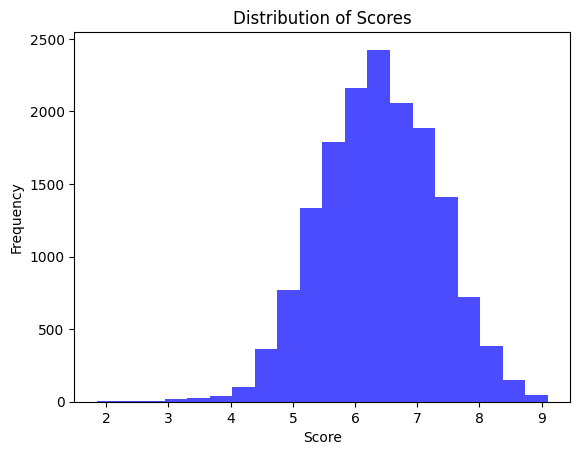

In [24]:
import matplotlib.pyplot as plt

plt.hist(filtered_item_data_df['Score'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [25]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Replace 'UNKNOWN' with NaN for consistent handling of missing values
filtered_item_data_df['Score'] = filtered_item_data_df['Score'].replace('UNKNOWN', pd.NA)

# Initialize SimpleImputer with mean or median strategy
imputer = SimpleImputer(strategy='mean')  # Change to 'median' if distribution is skewed

# Apply imputation on the Score column
filtered_item_data_df['Score'] = imputer.fit_transform(filtered_item_data_df[['Score']])

# Verify that there are no missing values left in Score
print(filtered_item_data_df['Score'].isna().sum())  # Should print 0


0


In [26]:
# Keep rows where both 'Score' and 'Release_Year' are not null
filtered_item_data_df = filtered_item_data_df[filtered_item_data_df["Score"].notna() & filtered_item_data_df["Release_Year"].notna()]

In [27]:
print(filtered_item_data_df.isna().sum())

anime_id                                 0
Name                                     0
English name                             0
Other name                               0
Score                                    0
Synopsis                                 0
Source                                   0
Rating                                   0
Rank                                     0
Popularity                               0
Favorites                                0
Scored By                                0
Members                                  0
Image URL                                0
Genre_Action                             0
Genre_Adventure                          0
Genre_Avant Garde                        0
Genre_Award Winning                      0
Genre_Boys Love                          0
Genre_Comedy                             0
Genre_Drama                              0
Genre_Ecchi                              0
Genre_Erotica                            0
Genre_Fanta

In [28]:
filtered_item_data_df.shape

(20246, 50)

In [29]:
user_data.columns

Index(['user_id', 'Username', 'Mean Score', 'Completed', 'avg_Action',
       'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
       'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
       'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
       'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
       'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
       'Age', 'Viewer_Category', 'Category_Classic_Era_Fans',
       'Category_Gen_Alpha_Viewers', 'Category_Millennial_Favorites',
       'Category_Retro_Anime_Lovers', 'Category_Zoomer_Picks', 'Gender_Female',
       'Gender_Male', 'Gender_Non-Binary'],
      dtype='object')

In [30]:
filtered_item_data_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Synopsis',
       'Source', 'Rating', 'Rank', 'Popularity', 'Favorites', 'Scored By',
       'Members', 'Image URL', 'Genre_Action', 'Genre_Adventure',
       'Genre_Avant Garde', 'Genre_Award Winning', 'Genre_Boys Love',
       'Genre_Comedy', 'Genre_Drama', 'Genre_Ecchi', 'Genre_Erotica',
       'Genre_Fantasy', 'Genre_Girls Love', 'Genre_Gourmet', 'Genre_Hentai',
       'Genre_Horror', 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi',
       'Genre_Slice of Life', 'Genre_Sports', 'Genre_Supernatural',
       'Genre_Suspense', 'Genre_UNKNOWN', 'Type_Movie', 'Type_Music',
       'Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV', 'Type_UNKNOWN',
       'Rating_G - All Ages', 'Rating_PG - Children',
       'Rating_PG-13 - Teens 13 or older',
       'Rating_R - 17+ (violence & profanity)', 'Rating_R+ - Mild Nudity',
       'Rating_Rx - Hentai', 'Release_Year'],
      dtype='object')

In [31]:
user_input.columns

Index(['Username', 'Gender', 'Mean Score', 'Completed', 'Birth_Year',
       'user_id', 'anime_id', 'Anime Title', 'rating', 'Genres',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense'],
      dtype='object')

In [32]:
# Check if any column in filtered_item_data_df contains the value 'UNKNOWN'
columns_with_unknown = filtered_item_data_df.columns[filtered_item_data_df.isin(['UNKNOWN']).any()]

# Print the columns that contain 'UNKNOWN'
print("Columns containing 'UNKNOWN':", list(columns_with_unknown))


Columns containing 'UNKNOWN': ['English name', 'Other name', 'Rating', 'Scored By']


In [33]:
unknown_counts = filtered_item_data_df.isin(['UNKNOWN']).sum().sum()
print(f"Total instances with 'UNKNOWN' values: {unknown_counts}")

Total instances with 'UNKNOWN' values: 16965


In [34]:
from scipy.sparse import csr_matrix, hstack
import numpy as np
import pandas as pd

def prepare_training_data(user_input_df, user_data_df, filtered_item_data_df):
    """
    Prepares training data for a neural network using sparse matrices during processing,
    then converts back to dense arrays in the output.
    
    Parameters:
    -----------
    user_input_df : DataFrame
        Contains user ratings for anime with columns including user_id, anime_id, rating
    user_data_df : DataFrame
        Contains user demographic data and average genre ratings
    filtered_item_data_df : DataFrame
        Contains anime metadata including genres, types, and ratings
        
    Returns:
    --------
    dict
        A dictionary containing:
        - 'X_U': User features array (dense)
        - 'X_A': Anime features array (dense)
        - 'Y': Rating values array
        - 'X_U_columns': List of column names for user features
        - 'X_A_columns': List of column names for anime features
        - 'Y_column': Name of the rating column
        - 'X_U_indices': List of indices for user features
        - 'X_A_indices': List of indices for anime features
        - 'Y_index': Index of the rating column
        - 'merged_df': The merged and cleaned dataframe
    """
    # Step 1: Merge dataframes with suffixes to handle column conflicts
    merged_df = user_input_df.merge(user_data_df, on='user_id', suffixes=('', '_user'))
    merged_df = merged_df.merge(filtered_item_data_df, on='anime_id', suffixes=('', '_anime'))
    
    # Step 2: Identify columns to drop (non-numerical or identifiers)
    columns_to_drop = ['Username', 'user_id', 'anime_id', 'Anime Title', 
                     'Name', 'English name', 'Other name', 'Synopsis', 
                     'Source', "Scored by", 'Image URL']
    
    # Only drop columns that actually exist in the merged dataframe
    columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]
    
    # Drop identified columns
    cleaned_df = merged_df.drop(columns_to_drop, axis=1)
    
    # Step 3: Define columns for each component
    X_U_columns = [
        'Mean Score', 'Completed',
        'avg_Action', 'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
        'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
        'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
        'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
        'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
        'Gender_Female', 'Gender_Male', 'Gender_Non-Binary',
        'Category_Classic_Era_Fans', 'Category_Gen_Alpha_Viewers',
        'Category_Millennial_Favorites', 
        'Category_Retro_Anime_Lovers', 
        'Category_Zoomer_Picks'
    ]
    
    excluded_columns = ['anime_id', 'Name', 'English name', 'Other name',
                      'Score', "Synopsis", "Source", "Rank","Rating"]
    
    X_A_columns = [col for col in filtered_item_data_df.columns 
                  if col not in excluded_columns and col in cleaned_df.columns]
    X_U_columns = [col for col in X_U_columns if col in cleaned_df.columns]
    
    Y_column = "rating"
    if Y_column not in cleaned_df.columns:
        raise ValueError(f"Rating column '{Y_column}' not found in merged dataframe")
    
    # Step 4: Get indices for features
    X_U_indices = [cleaned_df.columns.get_loc(col) for col in X_U_columns]
    X_A_indices = [cleaned_df.columns.get_loc(col) for col in X_A_columns]
    Y_index = cleaned_df.columns.get_loc(Y_column)
    
    # Step 5: Process with sparse matrices
    # Convert relevant portions to sparse format
    X_U_sparse = csr_matrix(cleaned_df.iloc[:, X_U_indices].values)
    X_A_sparse = csr_matrix(cleaned_df.iloc[:, X_A_indices].values)
    
    # Perform sparse operations if needed (e.g., scaling)
    # ... (your sparse-compatible preprocessing here) ...
    
    # Convert back to dense for output (if your model requires dense inputs)
    X_U = X_U_sparse.toarray()
    X_A = X_A_sparse.toarray()
    Y = cleaned_df.iloc[:, Y_index].values
    
    return {
        "X_U": X_U,
        "X_A": X_A,
        "Y": Y,
        "X_U_columns": X_U_columns,
        "X_A_columns": X_A_columns,
        "Y_column": Y_column,
        "X_U_indices": X_U_indices,
        "X_A_indices": X_A_indices,
        "Y_index": Y_index,
        "merged_df": cleaned_df,
    }


In [35]:
# Prepare the training data
# Select a smaller dataframe with 200000 samples from user_input
user_input_sample = user_input.sample(n=200000, random_state=42)

# Ensure all columns in user_input_sample, user_data, and filtered_item_data_df are numeric
user_input_sample = user_input_sample.select_dtypes(include=[np.number])
user_data = user_data.select_dtypes(include=[np.number])
filtered_item_data_df = filtered_item_data_df.select_dtypes(include=[np.number])

# Prepare the training data using the sampled dataframe
result = prepare_training_data(user_input_sample, user_data, filtered_item_data_df)

# Access the prepared data
X_U = result['X_U']  # User features
X_A = result['X_A']  # Anime features
Y = result['Y']      # Ratings

# You can also access indices if needed
X_U_indices = result['X_U_indices']
X_A_indices = result['X_A_indices']

In [36]:
X_U.shape

(199414, 26)

In [37]:
X_A.shape

(199414, 39)

In [38]:
Y.shape

(199414,)

In [39]:
Y[:10]

array([9, 6, 6, 7, 4, 8, 9, 8, 6, 6])

# Neural Network for implementing Content Based Filtering:

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

# --- Scaling the data ---
# Create scalers
user_scaler = StandardScaler()
anime_scaler = StandardScaler()

# Ensure all columns in X_A are numeric
# Convert categorical columns (e.g., 'Rating') to numeric using one-hot encoding
#X_A_df = pd.DataFrame(X_A, columns=result['X_A_columns'])  # Convert X_A to DataFrame for easier processing

# print(X_A_df.columns)  # Check the columns after encoding
# Scale the features
X_U_scaled = user_scaler.fit_transform(X_U)
X_A_scaled = anime_scaler.fit_transform(X_A)

# --- Splitting the scaled data ---
# First split: 80% train+val, 20% test
X_U_temp, X_U_test, X_A_temp, X_A_test, Y_temp, Y_test = train_test_split(
    X_U_scaled, X_A_scaled, Y, test_size=0.2, random_state=42
)

# Second split: 75% train, 25% validation (results in 60% train, 20% val, 20% test overall)
X_U_train, X_U_val, X_A_train, X_A_val, Y_train, Y_val = train_test_split(
    X_U_temp, X_A_temp, Y_temp, test_size=0.25, random_state=42
)

print(f"Training set: {X_U_train.shape[0]} samples")
print(f"Validation set: {X_U_val.shape[0]} samples")
print(f"Test set: {X_U_test.shape[0]} samples")




Training set: 119648 samples
Validation set: 39883 samples
Test set: 39883 samples


In [42]:
# --- TensorFlow model ---
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define inputs for user and item features
user_input = tf.keras.Input(shape=(X_U_train.shape[1],), name="user_input")
item_input = tf.keras.Input(shape=(X_A_train.shape[1],), name="item_input")

# Define user network with dropout for regularization
user_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='linear')
], name="user_nn")

# Define item network with dropout for regularization
item_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='linear')
], name="item_nn")

# Pass inputs through respective networks
vu = user_nn(user_input)
va = item_nn(item_input)

# Compute dot product
output = tf.keras.layers.Dot(axes=1)([vu, va])

# Create model
model = tf.keras.Model([user_input, item_input], output)

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Model summary
model.summary()

# Train the model
history = model.fit(
    [X_U_train, X_A_train],
    Y_train,
    validation_data=([X_U_val, X_A_val], Y_val),
    epochs=60,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 26)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 39)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_nn             │ (None, 32)        │     51,936 │ user_input[0][0]  │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_nn             │ (None, 32)        │     55,264 │ item_input[0][0]  │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ user_nn[0][0],    │
│                     │                   │            │ item_nn[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 107,200 (418.75 KB)

 Trainable params: 105,408 (411.75 KB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/60
3739/3739 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 24.6080 - mean_absolute_error: 3.2725 - val_loss: 2.0530 - val_mean_absolute_error: 1.0904 - learning_rate: 0.0010
Epoch 2/60
3739/3739 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 2.1625 - mean_absolute_error: 1.1340 - val_loss: 1.9342 - val_mean_absolute_error: 1.0536 - learning_rate: 0.0010
Epoch 3/60
3739/3739 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 2.0170 - mean_absolute_error: 1.0923 - val_loss: 1.9055 - val_mean_absolute_error: 1.0433 - learning_rate: 0.0010
Epoch 4/60
3739/3739 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.9341 - mean_absolute_error: 1.0677 - val_loss: 1.8413 - val_mean_absolute_error: 1.0259 - learning_rate: 0.0010
Epoch 5/60
3739/3739 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.8755 - mean_absolute_error: 1.0489 - val_loss: 1.7877 - val_mean_absolute_error: 1.0098 - learning_rate: 0.0010
Epoch 6/60
3739/3739 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 1.8323 - mean_absolute_error: 1.0370 - val_loss: 1.

In [43]:
# Evaluate on test set
test_results = model.evaluate([X_U_test, X_A_test], Y_test, verbose=1)
print(f"Test loss (MSE): {test_results[0]}")
print(f"Test MAE: {test_results[1]}")

1247/1247 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6543 - mean_absolute_error: 0.9725
Test loss (MSE): 1.6370973587036133
Test MAE: 0.970239520072937


In [44]:
# Save in TensorFlow SavedModel format
model.export('../saved_model/recommender_model_5')

# Save in HDF5 format
model.save('../saved_model/recommender_model_5.h5', save_format='h5')


INFO:tensorflow:Assets written to: ../saved_model/recommender_model_5\assets


INFO:tensorflow:Assets written to: ../saved_model/recommender_model_5\assets


Saved artifact at '../saved_model/recommender_model_5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 26), dtype=tf.float32, name='user_input'), TensorSpec(shape=(None, 39), dtype=tf.float32, name='item_input')]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2635126906064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126903952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126904144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126902992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126904336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126903568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126904720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126901840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126900880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2635126905104: TensorS

In [45]:
# # Save in TensorFlow SavedModel format
# model.export('../saved_model/recommender_model_2')

# # Save in HDF5 format
# model.save('../recommender_model_2.h5', save_format='h5')


In [46]:
model=tf.keras.models.load_model('../saved_model/recommender_model_5.h5')


In [47]:
import numpy as np
X_U_test[:5]


array([[-0.98965188, -0.22051907, -0.38007022, -0.43310719,  0.1133751 ,
        -0.0939215 ,  0.1675034 , -1.05901591, -0.27850162, -1.29044085,
        -2.18552196, -0.3773842 , -1.89376243, -1.4985865 , -0.69818678,
        -0.33805474,  0.19274676, -0.59244886, -0.70618884, -0.91375968,
        -3.24719741, -0.05151517,  0.47097244, -0.64025301,  0.64588565,
        -0.0603226 ],
       [-0.58496404, -0.42199343, -0.77083646, -0.46852991,  0.13738286,
        -0.11975497,  0.1675034 , -0.48695055, -0.91781178, -0.24309694,
         0.0742905 , -0.24854784,  0.11341228, -1.15883208,  0.09474619,
        -0.94629719, -0.72719851, -0.36796787, -0.56181687, -0.54637608,
         0.21853859, -0.84524904, -0.48072108, -0.64025301,  0.64588565,
        -0.0603226 ],
       [-1.59668364,  0.66336846, -1.83323218, -1.4603659 , -0.32676706,
        -1.01100951, -0.70651971, -1.46422888, -1.5179805 , -1.37919881,
         0.0742905 , -1.43149982, -0.87691181, -1.24119679,  0.09474619,
       

In [48]:
X_A_test[:5]

array([[ 0.65562593, -0.36139309, -0.61492479, -0.87186362, -0.58855008,
        -0.11829435, -0.29748685, -0.11009191,  1.23694159, -0.65355018,
        -0.32889138, -0.05656456, -0.63779374, -0.1043251 , -0.07535655,
        -0.12748236, -0.24508024, -0.34516694, -0.64304102, -0.55899749,
        -0.22349669, -0.16714966, -0.4601306 , -0.21371213, -0.07282469,
        -0.41755222, -0.06413937, -0.12460821,  2.73185176, -0.26775345,
        -1.35410172,  0.        , -0.20635892, -0.18403974, -1.16611204,
         1.88005579, -0.35801571, -0.12727908,  0.42531758],
       [-0.14231978, -0.34695551, -0.47672977,  1.14696838,  1.69909076,
        -0.11829435, -0.29748685, -0.11009191, -0.80844561, -0.65355018,
        -0.32889138, -0.05656456,  1.56790501, -0.1043251 , -0.07535655,
        -0.12748236, -0.24508024, -0.34516694, -0.64304102, -0.55899749,
        -0.22349669, -0.16714966, -0.4601306 , -0.21371213, -0.07282469,
        -0.41755222, -0.06413937, -0.12460821,  2.73185176, -0.

In [53]:
#Make predictions on X-U_test and X-A_test
predictions = model.predict([X_U_test[:20], X_A_test[:20]])
predictions[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[7.2718883],
       [7.962675 ],
       [6.3944054],
       [5.7783704],
       [9.027118 ]], dtype=float32)

In [52]:
Y_test[:5]

array([ 8,  8,  6,  8, 10])

In [51]:
# Optional: Plot training history
# Uncomment if you're running in an environment that supports plotting
"""
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 4))\nplt.subplot(1, 2, 1)\nplt.plot(history.history['loss'], label='Training Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.title('Loss Over Epochs')\nplt.xlabel('Epoch')\nplt.ylabel('Loss (MSE)')\nplt.legend()\n\nplt.subplot(1, 2, 2)\nplt.plot(history.history['mean_absolute_error'], label='Training MAE')\nplt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')\nplt.title('Mean Absolute Error Over Epochs')\nplt.xlabel('Epoch')\nplt.ylabel('MAE')\nplt.legend()\nplt.tight_layout()\nplt.show()\n"

Utilizing MLP from scikit learn 